# **1. Uvod**
Ovaj projekt bavi se predviđanjem rezultata March Madness-a korištenjem stojnog učenja. March madness(MM) je popularan košarkaški turnir u kojem svake godine sudjeluje 68 sveučilišnih timova i popularna je praksa da navijači,a i ostali zainteresirani ispunjavaju svoja predviđanja o tome tko će pobijediti. A rješavanjem tog problema bavit će se ovaj projekt.

**NAPOMENA** Podatke koji su na GitHubu treba uploadati prije da bi mogli izvršavati kod.

# 2. Učitavanje i prikazivanje podataka

U ovom djelu učitati ću i vizualizirati podatke s kojima ću raditi, te ću ih prilagoditi da budu pogodni ako nisu.

In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Kodovi ispod učitat će sve potrebne podatke i pokazat će prvih 5 redaka svakog skupa da vidimo kako su formirani podatci.

In [73]:
regular_seasons = pd.read_csv("regular_season_results.csv")
regular_seasons.head()

,season,daynum,wteam,wscore,lteam,lscore,wloc,numot
0,A,16,511,91,647,57,H,NaN
1,A,16,515,75,812,67,H,NaN
2,A,16,606,87,658,67,H,NaN
3,A,16,670,73,573,65,H,NaN
4,A,16,721,99,632,68,H,NaN


Regular_seasons data frame pokazuje najbitnije podatke tj. rezultate svih utakmica regularne sezone za sve timove koji sudjeluju u MM.

Pojašnjenja pojedinih značajki:

season- sezone su označene slovima od A do S gdje je A sezona 1995/96, a S sezona 2013/14.
1. daynum-pokazuje koji je dan sezone utakmica odigrana
2. wteam- pokazuje index pobjedničkog tima
3. wscore- pokazuje poene pobjedničkog tima
4. lteam- pokazuje index gubitničkog tima
5. lscore- pokazuje poene gubitničkog tima
6. wloc- ima 3 vrijednosti H(Home), A(Away), N(Neutral) koje pokazuju mjesto igranja
7. numot- pokazuje broj produžetaka u utakmici

In [74]:
seasons = pd.read_csv("seasons.csv")
seasons.head()

,season,years,dayzero,regionW,regionX,regionY,regionZ
0,A,1995-1996,10/30/1995,East,Midwest,Southeast,West
1,B,1996-1997,10/28/1996,East,Southeast,Midwest,West
2,C,1997-1998,10/27/1997,East,West,Midwest,South
3,D,1998-1999,10/26/1998,East,Midwest,South,West
4,E,1999-2000,11/01/1999,Midwest,West,East,South


Seasons data frame pokazuje podatke o sezoni.

Pojašnjenja pojedinih značajki:

1. season- sezone su označene slovima od A do S gdje je A sezona 1995/96, a S sezona 2013/14.
2. years- godina igranja
3. dayzero-pokazuje početni dan sezone
4. region(W, X, Y, Z)- pokazuje koje 4 regije su sudjelovale u turniru.

In [75]:
teams = pd.read_csv("teams.csv")
teams.head()

,id,name
0,501,Abilene Chr
1,502,Air Force
2,503,Akron
3,504,Alabama
4,505,Alabama A&M


Teams data frame pokazuje imena timova za zadani id.

In [76]:
tourney_results = pd.read_csv("tourney_results.csv")
tourney_results.head()

,season,daynum,wteam,wscore,lteam,lscore,numot
0,A,136,515,86,729,80,NaN
1,A,136,559,68,555,59,NaN
2,A,136,576,75,666,63,NaN
3,A,136,581,75,577,60,NaN
4,A,136,604,81,551,74,NaN


Tourney_results data frame ima iste značajke tko regular_season data frame i pokazuje rezultate utakmice na samom turniru.

In [77]:
tourney_seeds = pd.read_csv("tourney_seeds.csv")
tourney_seeds.head()

,season,seed,team
0,A,W01,663
1,A,W02,603
2,A,W03,796
3,A,W04,660
4,A,W05,729


Tourney_seeds pokazuje kako je koji tim bio rangiran prije turnira za svaku od 4 regije(W, X, Y, Z).

In [78]:
tourney_slots = pd.read_csv("tourney_slots.csv")
tourney_slots.head()

,season,slot,strongseed,weakseed
0,A,R1W1,W01,W16
1,A,R1W2,W02,W15
2,A,R1W3,W03,W14
3,A,R1W4,W04,W13
4,A,R1W5,W05,W12


Tourney_slots pokazuje pobjednike utakmica za određenu rundu u toj sezoni.

#3. Rješavanje Nan vrijednosti
Ovdje sam riješio problem NaN vrijednosti.

In [79]:
regular_seasons.info()
print()
seasons.info()
print()
teams.info()
print()
tourney_results.info()
print()
tourney_seeds.info()
print()
tourney_slots.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91224 entries, 0 to 91223
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   season  91224 non-null  object 
 1   daynum  91224 non-null  int64  
 2   wteam   91224 non-null  int64  
 3   wscore  91224 non-null  int64  
 4   lteam   91224 non-null  int64  
 5   lscore  91224 non-null  int64  
 6   wloc    91224 non-null  object 
 7   numot   51333 non-null  float64
dtypes: float64(1), int64(5), object(2)
memory usage: 5.6+ MB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   season   19 non-null     object
 1   years    19 non-null     object
 2   dayzero  19 non-null     object
 3   regionW  19 non-null     object
 4   regionX  19 non-null     object
 5   regionY  19 non-null     object
 6   regionZ  19 non-null     object
dtypes: object(7)
memory

Gore ispisani rezultati funkcijom *info* pokazuju da jedina značajka koja sadrži NaN vrijednosti je *numot* i to u oba data frame-a u kojima se nalazi. Sada moramo vidjeti kako ćemo riješiti taj problem.

Pošto količina produžetaka nije toliko bitan podatak i većina utakmica nema produžetke sve NaN vrijednosti zamijenit ću s 0. Da je to dobra praksa pokazuje i informacija da je 94.07% utakmica završilo bez produžetaka.

Gore kod ispisa vidimo da tourney_results ima indexe samo od A do R, a to je zato što ću nad ostalim podatcima koji su dani za S sezonu raditi predviđanje..

In [80]:
utakmice_bez_OT = regular_seasons.query('numot == 0.0')
num_of_non_nan=51333 #vidi se gore u ispisu
print(len(utakmice_bez_OT)/num_of_non_nan)

0.9407009136422964


In [81]:
regular_seasons["numot"] = regular_seasons["numot"].replace(np.nan, 0.0)
tourney_results["numot"] = tourney_results["numot"].replace(np.nan, 0.0)

In [82]:
regular_seasons.info()
print()
tourney_results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91224 entries, 0 to 91223
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   season  91224 non-null  object 
 1   daynum  91224 non-null  int64  
 2   wteam   91224 non-null  int64  
 3   wscore  91224 non-null  int64  
 4   lteam   91224 non-null  int64  
 5   lscore  91224 non-null  int64  
 6   wloc    91224 non-null  object 
 7   numot   91224 non-null  float64
dtypes: float64(1), int64(5), object(2)
memory usage: 5.6+ MB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   season  1156 non-null   object 
 1   daynum  1156 non-null   int64  
 2   wteam   1156 non-null   int64  
 3   wscore  1156 non-null   int64  
 4   lteam   1156 non-null   int64  
 5   lscore  1156 non-null   int64  
 6   numot   1156 non-null   float64
dtypes: float64(1), 

Vidi se da sam uspješno promijenio NaN vrijednosti u 0 i sad mogu krenuti s rješavanjem stršećih podataka.





#4. Potraga za stršećim vrijednostima i rješavanje istih.


Prvo sam za svaki dataset pozvao *describe* da vidim ima li uopće stršećih vrijednosti.

In [83]:
regular_seasons.describe()

,daynum,wteam,wscore,lteam,lscore,numot
count,91224.000000,91224.000000,91224.000000,91224.000000,91224.000000,91224.000000
mean,73.410133,680.981058,75.370440,677.047400,63.208860,0.040516
std,34.210997,103.099502,11.408528,102.950054,10.940295,0.237701
min,0.000000,501.000000,34.000000,501.000000,20.000000,0.000000
25%,44.000000,592.000000,68.000000,587.000000,56.000000,0.000000
50%,75.000000,678.000000,75.000000,675.000000,63.000000,0.000000
75%,103.000000,772.000000,83.000000,768.000000,70.000000,0.000000
max,133.000000,856.000000,153.000000,856.000000,140.000000,6.000000


Vidi se da značajke wteam, lteam i numot imaju maximume koji se dosta razlikuju od njihovih prosjeka. Njih bi mogli nazvati stršećim vrijednostima, ali ih nećemo maknuti iz skupa jer iako one jesu stršeće vrijednosti, utakmice s puno produžetaka se događaju u košarci, a ako je puno produžetaka to znači da će biti i puno bodova.

Kod ispod pokazuje da je utakmica s najviše produžetaka imala puno poena, a utakmice s najviše zabijenih i primljenih poena imaju 0 produžetaka. Pomislili bi da bi ih zato trebalo izbaciti van, ali to su utakmice iz sezona kad produžetci nisi brojani pa je 0 dodana gore kada smo rješavali NaN vrijednosti stoga ću ih ostaviti.

In [84]:
print(regular_seasons.loc[regular_seasons['numot']==6.0])
print(regular_seasons.loc[regular_seasons['wscore']==153.0])
print(regular_seasons.loc[regular_seasons['lscore']==140.0])

      season  daynum  wteam  wscore  lteam  lscore wloc  numot
64701      N     129    786     127    559     117    N    6.0
     season  daynum  wteam  wscore  lteam  lscore wloc  numot
8808      C      33    788     153    803      87    H    0.0
      season  daynum  wteam  wscore  lteam  lscore wloc  numot
34527      H     110    776     142    648     140    H    0.0


In [85]:
tourney_results.describe()

,daynum,wteam,wscore,lteam,lscore,numot
count,1156.000000,1156.000000,1156.000000,1156.000000,1156.000000,1156.000000
mean,139.143599,682.515571,75.549308,686.699827,63.667820,0.038062
std,4.213580,98.684397,10.941410,103.201450,10.567058,0.224718
min,134.000000,504.000000,43.000000,502.000000,29.000000,0.000000
25%,136.000000,606.000000,68.000000,603.750000,57.000000,0.000000
50%,137.000000,671.000000,75.000000,681.500000,63.000000,0.000000
75%,139.000000,783.000000,82.000000,783.000000,70.000000,0.000000
max,154.000000,853.000000,121.000000,853.000000,105.000000,2.000000


Za skup tourney_results vrijede isti zaključci kao i za skup regular_seasons jer se oba skupa sastoje od istih značajki.

Ostali skupovi ne sadrže značajke koje bi mogle sadržavati stršeće vrijednosti, čime sam efektivno riješio problem stršećih vrijednosti. Da bi to pokazao ispod su prikazane *describe* tablice za svaki od preostalih skupova.

In [86]:
tourney_slots.describe()

,season,slot,strongseed,weakseed
count,1223,1223,1223,1223
unique,19,74,74,74
top,S,R1W1,W01,W16
freq,67,19,19,19


In [87]:
seasons.describe()

,season,years,dayzero,regionW,regionX,regionY,regionZ
count,19,19,19,19,19,19,19
unique,19,19,19,4,7,7,6
top,A,1995-1996,10/30/1995,East,South,Midwest,West
freq,1,1,1,15,6,9,12


In [88]:
tourney_seeds.describe()

,team
count,1242.000000
mean,685.844605
std,103.133122
min,502.000000
25%,603.000000
50%,680.000000
75%,783.000000
max,853.000000


In [89]:
teams.describe()

,id
count,356.000000
mean,678.500000
std,102.912584
min,501.000000
25%,589.750000
50%,678.500000
75%,767.250000
max,856.000000


#5. Vizualizacija podataka
Ovdje sam dobivene podatke prikazao s grafovima da čitatelj lakše shvati skup podataka.

Kod ispod pokazuje je pozicije pobjednika kroz sezone za vizualizaciju utjecaja pozicije na pobjedu.

Drugi graf ispod pokazuje broj pobjednika iz pojedine regije.

4 7 4 3


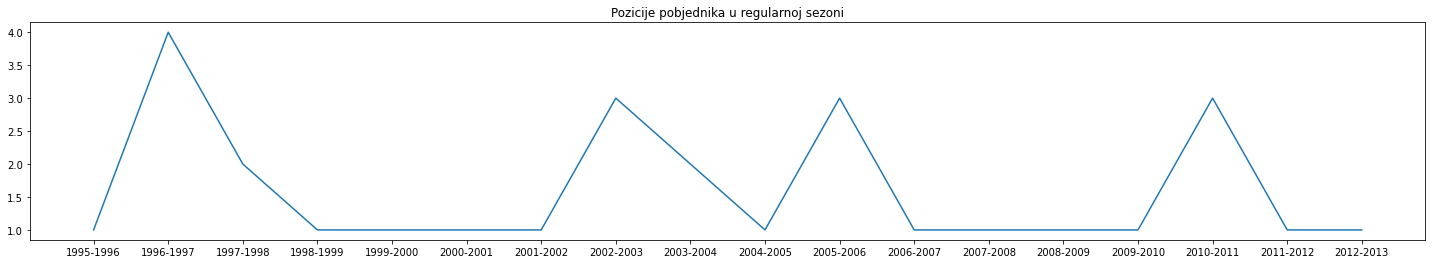

<BarContainer object of 1 artists>

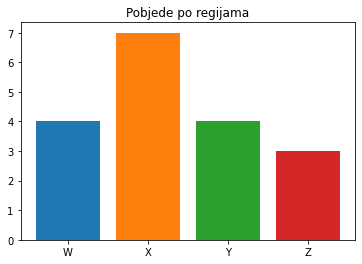

In [90]:
finals=tourney_results.loc[tourney_results['daynum']==154]
winners=finals[['season', 'wteam']]
winners=winners.set_index('season')
winners_seeds=[]

sezone=list(seasons['season'])
w=0
x=0
y=0
z=0
for i in range(len(winners)):
  winner_seed=list(tourney_seeds.loc[tourney_seeds['team']==winners['wteam'][i]].loc[tourney_seeds['season']==sezone[i]]['seed'])
  winners_seeds.append(int(winner_seed[0][1:]))
 
  if winner_seed[0][0]=='W': 
    w+=1
  elif winner_seed[0][0]=='Z': 
    z+=1
  elif winner_seed[0][0]=='Y': 
    y+=1
  elif winner_seed[0][0]=='X': 
    x+=1

print(w,x,y,z)          

godine_sezona=seasons['years']
plt.figure(figsize=(25, 4))
plt.plot(godine_sezona[:-1], winners_seeds)
plt.title("Pozicije pobjednika u regularnoj sezoni")
plt.show()

plt.title("Pobjede po regijama")
plt.bar('W', w)
plt.bar('X', x)
plt.bar('Y', y)
plt.bar('Z', z)


Koristeći gore dobiveni skup winners, prikazat ćemo koliko je puta koji tim osvojio natjecanje, ako tim nije na grafu to znači da nije nikada osvojio natjecanje.

Text(0.5, 1.0, 'Broj pobjeda pojedinog tima')

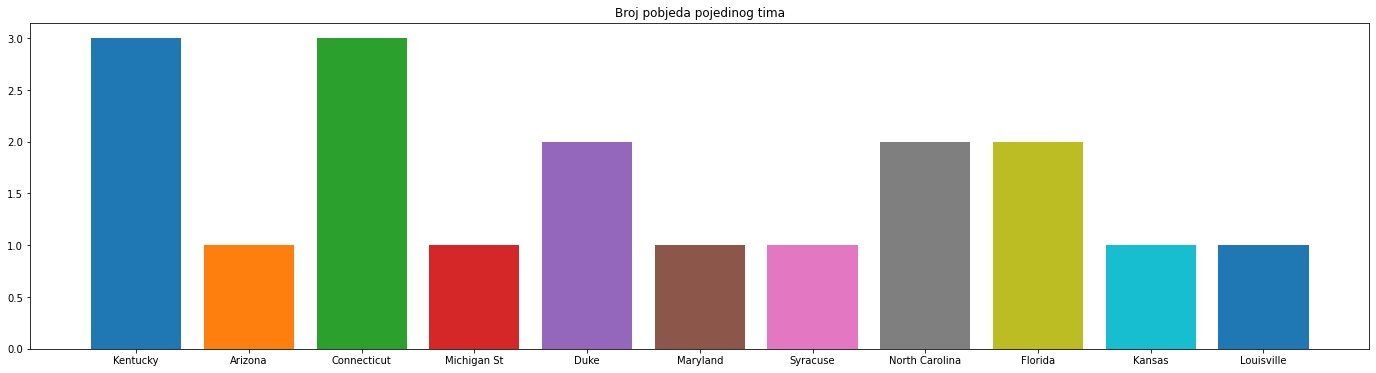

In [91]:
winners_count={}
for i in winners['wteam']:
  if i in winners_count:
    winners_count[i]+=1
  else:
    winners_count[i]=1

plt.figure(figsize=(24, 6))
for winner in winners_count:
  plt.bar(teams.loc[teams['id']==winner]['name'],winners_count[winner])

plt.title("Broj pobjeda pojedinog tima")  

Graf koji će nacrtati kod ispod pokazat će scatter plot boja odigranih turnira za svaki tim i onda kasnije broja odigranih turnira pobjednika.

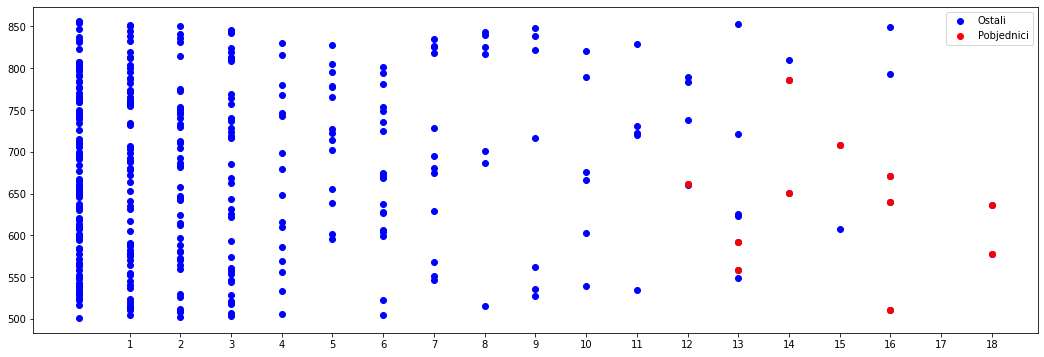

In [92]:
timovi=list(teams['id'])
sezone= list(seasons['season'])

sudjelovanja_timova=dict.fromkeys(timovi, 0)

for tim in timovi:
  for sezona in sezone:
    broj_pobjeda=len(tourney_results.loc[tourney_results['season']==sezona].loc[tourney_results['wteam']==tim])
    broj_poraza=len(tourney_results.loc[tourney_results['season']==sezona].loc[tourney_results['lteam']==tim])
    
    if (broj_pobjeda !=0) or (broj_poraza!=0):
      sudjelovanja_timova[tim]+=1

plt.figure(figsize=(18, 6))
plt.scatter(sudjelovanja_timova.values(), sudjelovanja_timova.keys(), c='blue', label='Ostali', data=range(1, 19, 1))

sudjelovanja_pobjednika={}

for winner in winners['wteam']:
  sudjelovanja_pobjednika[winner]=sudjelovanja_timova[winner]

plt.scatter(sudjelovanja_pobjednika.values(), sudjelovanja_pobjednika.keys(), c='red', label='Pobjednici', data=range(1, 19, 1))
plt.legend(loc='best')
plt.xticks(range(1, 19, 1))
plt.show()

Ovime je vizualizacija podataka gotova, nacrtani grafovi ukazuju nam da turnire osvajaju samo neki timovi,a njihov rezultat najčešće ovisi o poziciji u regularnoj sezoni i o iskustvu igranja prijašnjih turnira, jer škole koje su uspijevale prije ostaju na dobrom glasu pa onda uspijevaju i kasnije jer privlače bolje igraće.